<a href="https://colab.research.google.com/github/LSG626/data_analysis/blob/main/AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import requests
import pandas as pd

API_KEY = "Y1jjPqrJXeDs15L6RvIXAKbO9EWd5mwA"
SYMBOL = "AAPLE"

url = f"https://api.massive.com/v3/reference/dividends?apiKey="
params = {
    "apikey": API_KEY,
    "interval": "1d",
    "limit": 1000
}

response = requests.get(url, params=params)

data = response.json()

df = pd.DataFrame(data["results"])
df["ex_dividend_date"] = pd.to_datetime(df["ex_dividend_date"])
df.set_index("ex_dividend_date", inplace=True)

print(df.head())

                  cash_amount currency dividend_type  frequency  \
ex_dividend_date                                                  
2030-12-13           0.489757      USD            CD          4   
2030-09-13           0.484375      USD            CD          4   
2030-07-15           0.515625      USD            CD          4   
2030-06-14           0.478993      USD            CD          4   
2030-04-15           0.515625      USD            CD          4   

                                                                 id  \
ex_dividend_date                                                      
2030-12-13        E396fbae341a40e1373ea57ce984c386f06778209996e5...   
2030-09-13        Edd95a7bbac516897f19e62104fce597fc22bed2b4fa9a...   
2030-07-15        E423cf49e82932f378c27034ec2bd6fe3830606caa42d3...   
2030-06-14        Ee89ffa0dc20c03663d643fdbdb9d85f34460b75a2c6f0...   
2030-04-15        Ee4b12dadef7b17bcd4e3d76116f70a5fc96fcab3db650...   

                    pay_date rec

In [88]:
# Install yfinance library to fetch stock data
!pip install yfinance

In [89]:
import yfinance as yf
import pandas as pd

SYMBOL = "AAPL" # Using 'AAPL' as a standard symbol for Apple Inc.

# Fetch historical stock data
stock_data = yf.download(SYMBOL, period="1y") # Fetch data for the last 1 year

# Rename 'Close' to 'close' for consistency if needed, or adjust subsequent code
df = stock_data[['Close']].copy() # Create a new DataFrame with just the 'Close' price
df.rename(columns={'Close': 'close'}, inplace=True)

print(df.head())

/tmp/ipython-input-1010222601.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(SYMBOL, period="1y") # Fetch data for the last 1 year
[*********************100%***********************]  1 of 1 completed

Price            close
Ticker            AAPL
Date                  
2025-01-21  221.637573
2025-01-22  222.822235
2025-01-23  222.653015
2025-01-24  221.776947
2025-01-27  228.825089


In [90]:
import ta

# Calculate Moving Averages
df["ma_80"] = df[('close', 'AAPL')].rolling(window=80).mean()
df["ma_200"] = df[('close', 'AAPL')].rolling(window=200).mean()

# Calculate RSI
df["rsi"] = ta.momentum.RSIIndicator(close=df[('close', 'AAPL')]).rsi()

# Calculate MACD
macd_indicator = ta.trend.MACD(close=df[('close', 'AAPL')])
df["macd"] = macd_indicator.macd()
df["macd_signal"] = macd_indicator.macd_signal()
df["macd_diff"] = macd_indicator.macd_diff()

df.dropna(inplace=True)

print(df.head())

Price            close       ma_80      ma_200        rsi      macd  \
Ticker            AAPL                                                
Date                                                                  
2025-11-04  269.778473  237.722054  223.193091  67.453384  6.154883   
2025-11-05  269.878387  238.487150  223.434295  67.557724  6.048977   
2025-11-06  269.508728  239.234529  223.667727  66.705676  5.867580   
2025-11-07  268.209991  239.967419  223.895512  63.667515  5.554989   
2025-11-10  269.429993  240.701090  224.133777  65.267824  5.344100   

Price      macd_signal macd_diff  
Ticker                            
Date                              
2025-11-04    5.617533  0.537350  
2025-11-05    5.703822  0.345155  
2025-11-06    5.736574  0.131006  
2025-11-07    5.700257 -0.145267  
2025-11-10    5.629025 -0.284926  


In [91]:
df["target"] = (df["close"].shift(-1) > df["close"]).astype(int)

In [92]:
import yfinance as yf
import pandas as pd

SYMBOL = "AAPL" # Using 'AAPL' as a standard symbol for Apple Inc.

# Fetch historical stock data for the last 5 years
stock_data = yf.download(SYMBOL, period="5y")

# Create a new DataFrame with just the 'Close' price and rename it to 'close'
df = pd.DataFrame(stock_data['Close']).rename(columns={'Close': 'close'})

print(df.head())

/tmp/ipython-input-2980272295.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(SYMBOL, period="5y")
[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2021-01-21  133.236404
2021-01-22  135.378006
2021-01-25  139.125839
2021-01-26  139.359436
2021-01-27  138.288635


In [93]:
import ta

# Ensure the single column in df is correctly named 'close'
# The column name from yfinance can sometimes be 'AAPL' or ('Close', 'AAPL')
# This line renames the first column, whatever its current name, to 'close'.
df.rename(columns={df.columns[0]: 'close'}, inplace=True)

# Calculate Moving Averages
df["ma_80"] = df['close'].rolling(window=80).mean()
df["ma_200"] = df['close'].rolling(window=200).mean()

# Calculate RSI
df["rsi"] = ta.momentum.RSIIndicator(close=df['close']).rsi()

# Calculate MACD
macd_indicator = ta.trend.MACD(close=df['close'])
df["macd"] = macd_indicator.macd()
df["macd_signal"] = macd_indicator.macd_signal()
df["macd_diff"] = macd_indicator.macd_diff()

# Handle Missing Values after indicator calculation
df.dropna(inplace=True)

# Create the Target Variable
df["target"] = (df["close"].shift(-1) > df["close"]).astype(int)

# Drop the last row as its target will be NaN after shifting
df.dropna(inplace=True)

# Separate Features (X) and Target (y)
X = df.drop(columns=['target'])
y = df['target']

print("DataFrame head with indicators and target:")
print(df.head())
print("\nX head:")
print(X.head())
print("\ny head:")
print(y.head())

DataFrame head with indicators and target:
Ticker           close       ma_80      ma_200        rsi      macd  \
Date                                                                  
2021-11-03  148.161148  144.057628  133.609175  60.894939  1.413944   
2021-11-04  147.642822  144.082485  133.681207  59.122121  1.451354   
2021-11-05  148.171692  144.122130  133.745176  60.389266  1.506312   
2021-11-08  147.348969  144.177004  133.786291  57.408003  1.466575   
2021-11-09  147.711380  144.284504  133.828051  58.382651  1.447639   

Ticker      macd_signal  macd_diff  target  
Date                                        
2021-11-03     0.956648   0.457296       0  
2021-11-04     1.055589   0.395765       1  
2021-11-05     1.145733   0.360579       0  
2021-11-08     1.209902   0.256673       1  
2021-11-09     1.257449   0.190190       0  

X head:
Ticker           close       ma_80      ma_200        rsi      macd  \
Date                                                            

In [94]:
split_index = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (844, 7)
X_test shape: (212, 7)
y_train shape: (844,)
y_test shape: (212,)


In [95]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


In [96]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.5142


In [97]:
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.5142


In [98]:
df["target_return"] = (df['close'].shift(-1) - df['close']) / df['close'] * 100
df.dropna(inplace=True)

print(df[['close', 'target_return']].head())

Ticker           close  target_return
Date                                 
2021-11-03  148.161148      -0.349839
2021-11-04  147.642822       0.358209
2021-11-05  148.171692      -0.555250
2021-11-08  147.348969       0.245955
2021-11-09  147.711380      -1.916344


In [99]:
X = df.drop(columns=['target', 'target_return'])
y = df['target_return']

print("X head (features for regression model):")
print(X.head())
print("\ny head (target_return for regression model):")
print(y.head())

X head (features for regression model):
Ticker           close       ma_80      ma_200        rsi      macd  \
Date                                                                  
2021-11-03  148.161148  144.057628  133.609175  60.894939  1.413944   
2021-11-04  147.642822  144.082485  133.681207  59.122121  1.451354   
2021-11-05  148.171692  144.122130  133.745176  60.389266  1.506312   
2021-11-08  147.348969  144.177004  133.786291  57.408003  1.466575   
2021-11-09  147.711380  144.284504  133.828051  58.382651  1.447639   

Ticker      macd_signal  macd_diff  
Date                                
2021-11-03     0.956648   0.457296  
2021-11-04     1.055589   0.395765  
2021-11-05     1.145733   0.360579  
2021-11-08     1.209902   0.256673  
2021-11-09     1.257449   0.190190  

y head (target_return for regression model):
Date
2021-11-03   -0.349839
2021-11-04    0.358209
2021-11-05   -0.555250
2021-11-08    0.245955
2021-11-09   -1.916344
Name: target_return, dtype: float64


In [100]:
split_index = int(len(X) * 0.8)

X_train_reg, X_test_reg = X.iloc[:split_index], X.iloc[split_index:]
y_train_reg, y_test_reg = y.iloc[:split_index], y.iloc[split_index:]

print(f"X_train_reg shape: {X_train_reg.shape}")
print(f"X_test_reg shape: {X_test_reg.shape}")
print(f"y_train_reg shape: {y_train_reg.shape}")
print(f"y_test_reg shape: {y_test_reg.shape}")

X_train_reg shape: (844, 7)
X_test_reg shape: (211, 7)
y_train_reg shape: (844,)
y_test_reg shape: (211,)


In [101]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_reg, y_train_reg)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [102]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_reg = linear_model.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)

r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Linear Regression Model MAE: {mae:.4f}")
print(f"Linear Regression Model R-squared: {r2:.4f}")

Linear Regression Model MAE: 1.2260
Linear Regression Model R-squared: 0.0111


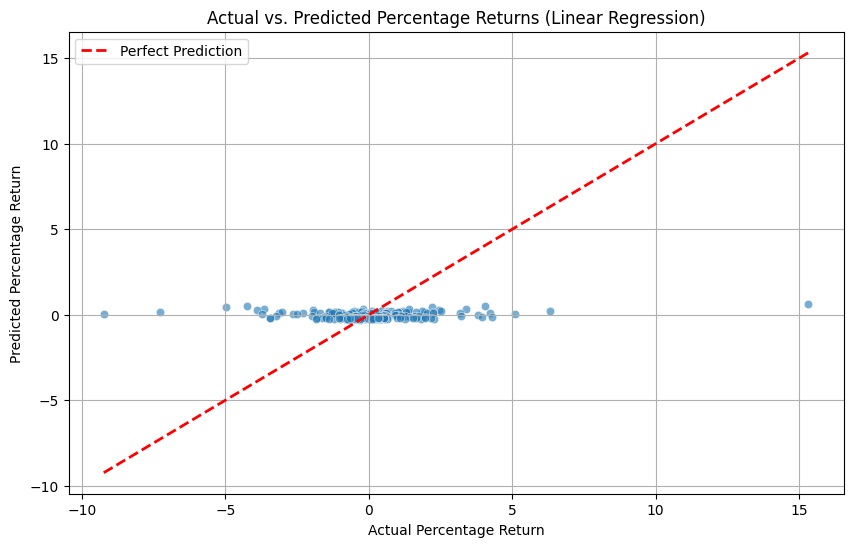

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Percentage Returns (Linear Regression)')
plt.xlabel('Actual Percentage Return')
plt.ylabel('Predicted Percentage Return')
plt.legend()
plt.grid(True)
plt.show()


In [104]:
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.5142


In [105]:
import yfinance as yf
import pandas as pd

SYMBOL = "AAPL"

# Fetch historical stock data for the last 1 year
latest_stock_data = yf.download(SYMBOL, period="1y")

# Create a new DataFrame with just the 'Close' price and rename it to 'close'
latest_df = pd.DataFrame(latest_stock_data['Close']).rename(columns={'Close': 'close'})

print(latest_df.head())

/tmp/ipython-input-2038901790.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  latest_stock_data = yf.download(SYMBOL, period="1y")
[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2025-01-21  221.637589
2025-01-22  222.822235
2025-01-23  222.653000
2025-01-24  221.776962
2025-01-27  228.825089


In [106]:
import ta

# Ensure the single column in latest_df is correctly named 'close'
# The column name from yfinance can sometimes be 'AAPL'.
latest_df.rename(columns={'AAPL': 'close'}, inplace=True)

# Calculate Moving Averages
latest_df["ma_80"] = latest_df['close'].rolling(window=80).mean()
latest_df["ma_200"] = latest_df['close'].rolling(window=200).mean()

# Calculate RSI
latest_df["rsi"] = ta.momentum.RSIIndicator(close=latest_df['close']).rsi()

# Calculate MACD
macd_indicator = ta.trend.MACD(close=latest_df['close'])
latest_df["macd"] = macd_indicator.macd()
latest_df["macd_signal"] = macd_indicator.macd_signal()
latest_df["macd_diff"] = macd_indicator.macd_diff()

# Drop rows with NaN values resulting from indicator calculations
latest_df.dropna(inplace=True)

print("Latest data with technical indicators:")
print(latest_df.tail())

Latest data with technical indicators:
Ticker           close       ma_80      ma_200        rsi      macd  \
Date                                                                  
2026-01-13  261.049988  266.279447  233.188190  32.453827 -3.615551   
2026-01-14  259.959991  266.463169  233.402203  30.857701 -3.727950   
2026-01-15  258.209991  266.492894  233.586388  28.439353 -3.913130   
2026-01-16  255.529999  266.509724  233.751891  25.184251 -4.227408   
2026-01-20  246.699997  266.442653  233.869756  17.910429 -5.129850   

Ticker      macd_signal  macd_diff  
Date                                
2026-01-13    -2.222505  -1.393046  
2026-01-14    -2.523594  -1.204356  
2026-01-15    -2.801501  -1.111629  
2026-01-16    -3.086683  -1.140725  
2026-01-20    -3.495316  -1.634533  


In [107]:
X_latest = latest_df[['close', 'ma_80', 'ma_200', 'rsi', 'macd', 'macd_signal', 'macd_diff']]

print("Features for latest prediction (X_latest head):")
print(X_latest.head())

Features for latest prediction (X_latest head):
Ticker           close       ma_80      ma_200        rsi      macd  \
Date                                                                  
2025-11-04  269.778473  237.722054  223.193091  67.453384  6.154883   
2025-11-05  269.878387  238.487150  223.434295  67.557724  6.048977   
2025-11-06  269.508728  239.234529  223.667727  66.705676  5.867580   
2025-11-07  268.209991  239.967419  223.895512  63.667515  5.554989   
2025-11-10  269.429993  240.701090  224.133777  65.267824  5.344100   

Ticker      macd_signal  macd_diff  
Date                                
2025-11-04     5.617533   0.537350  
2025-11-05     5.703822   0.345155  
2025-11-06     5.736574   0.131006  
2025-11-07     5.700257  -0.145267  
2025-11-10     5.629025  -0.284926  


In [108]:
predicted_return_tomorrow = linear_model.predict(X_latest.tail(1))

print(f"Predicted percentage return for tomorrow: {predicted_return_tomorrow[0]:.4f}%")

Predicted percentage return for tomorrow: -0.1740%


In [109]:
predicted_direction_tomorrow = model.predict(X_latest.tail(1))

print(f"Predicted price direction for tomorrow (0 = down, 1 = up): {predicted_direction_tomorrow[0]}")

Predicted price direction for tomorrow (0 = down, 1 = up): 0


In [110]:
latest_close_price = latest_df['close'].iloc[-1]

print(f"Latest closing price: {latest_close_price:.2f}")

direction_text = "up" if predicted_direction_tomorrow[0] == 1 else "down"

summary_text = f"Based on the analysis:\n"
summary_text += f"The latest closing price for AAPL is: ${latest_close_price:.2f}.\n"
summary_text += f"The predicted price direction for tomorrow is: {direction_text}.\n"
summary_text += f"The estimated percentage return for tomorrow is: {predicted_return_tomorrow[0]:.4f}%."

print("\n" + summary_text)

Latest closing price: 246.70

Based on the analysis:
The latest closing price for AAPL is: $246.70.
The predicted price direction for tomorrow is: down.
The estimated percentage return for tomorrow is: -0.1740%.


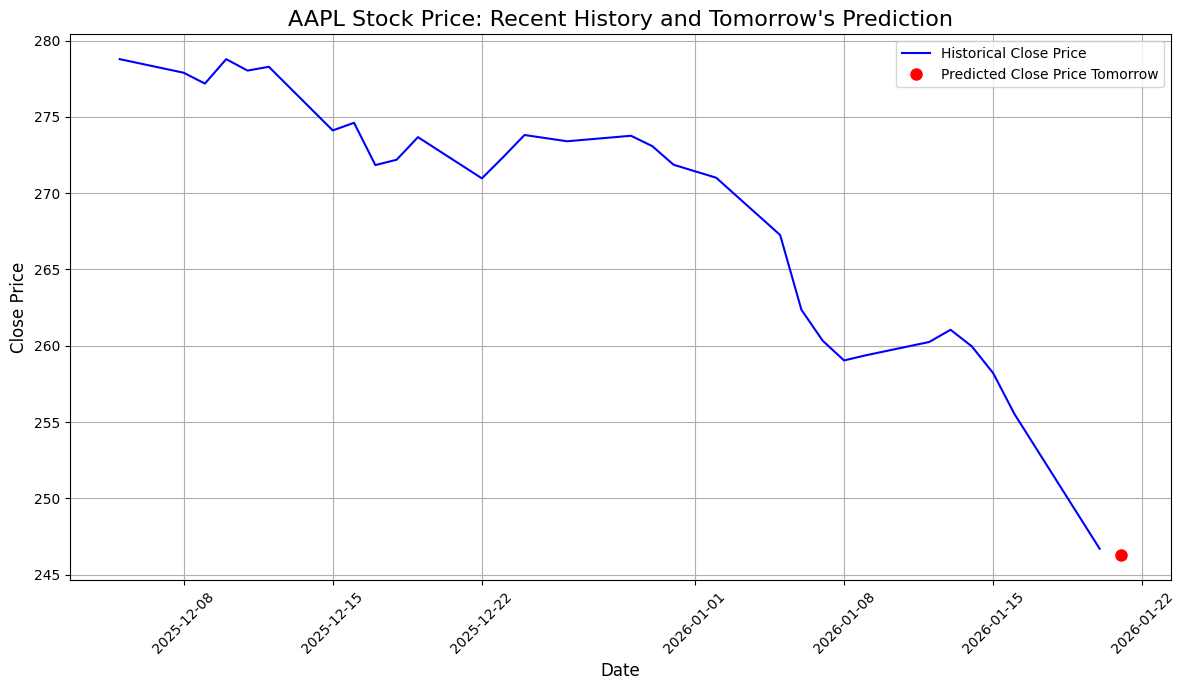

Plot showing historical prices and tomorrow's predicted price generated.


In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the last 30 'close' prices for historical visualization
historical_closes = latest_df['close'].tail(30)

# Calculate the predicted closing price for tomorrow
predicted_close_price_tomorrow = latest_close_price * (1 + predicted_return_tomorrow[0] / 100)

# Get the date for tomorrow
last_date = historical_closes.index[-1]
tomorrow_date = last_date + pd.Timedelta(days=1)

# Create a Series for the predicted price
predicted_price_series = pd.Series([predicted_close_price_tomorrow], index=[tomorrow_date], name='Predicted Close')

# Combine historical and predicted data for plotting
plot_data = pd.concat([historical_closes, predicted_price_series])

plt.figure(figsize=(12, 7))

# Plot historical 'close' prices
plt.plot(historical_closes.index, historical_closes.values, label='Historical Close Price', color='blue')

# Plot the predicted next day's closing price as a marker
plt.plot(tomorrow_date, predicted_close_price_tomorrow, 'ro', markersize=8, label='Predicted Close Price Tomorrow')

plt.title('AAPL Stock Price: Recent History and Tomorrow\'s Prediction', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Plot showing historical prices and tomorrow's predicted price generated.")

In [112]:
latest_close_price = latest_df['close'].iloc[-1]

print(f"Latest closing price: {latest_close_price:.2f}")

direction_text = "up" if predicted_direction_tomorrow[0] == 1 else "down"

summary_text = f"Based on the analysis:\n"
summary_text += f"The latest closing price for AAPL is: ${latest_close_price:.2f}.\n"
summary_text += f"The predicted price direction for tomorrow is: {direction_text}.\n"
summary_text += f"The estimated percentage return for tomorrow is: {predicted_return_tomorrow[0]:.4f}%."

print("\n" + summary_text)

Latest closing price: 246.70

Based on the analysis:
The latest closing price for AAPL is: $246.70.
The predicted price direction for tomorrow is: down.
The estimated percentage return for tomorrow is: -0.1740%.


In [113]:
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.5142
